<a href="https://colab.research.google.com/github/mdzikrim/Hands-on_DL/blob/main/Chapter_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [9]:
# XOR data
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y = np.array([[0],[1],[1],[0]], dtype=np.float32)

# Model XOR
model_xor = keras.models.Sequential([
    layers.Dense(4, activation="tanh", input_shape=(2,)),
    layers.Dense(1, activation="sigmoid")
])
model_xor.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model_xor.fit(X, y, epochs=500, verbose=0)

# Predict XOR
print(model_xor.predict(X).round())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[0.]
 [1.]
 [1.]
 [0.]]


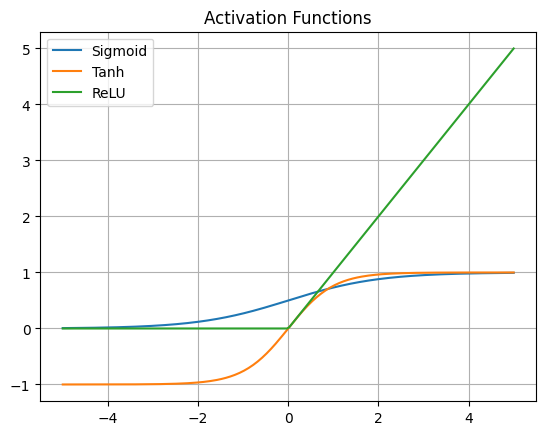

In [10]:
z = np.linspace(-5, 5, 200)

def sigmoid(x): return 1 / (1 + np.exp(-x))
def relu(x): return np.maximum(0, x)

plt.plot(z, sigmoid(z), label="Sigmoid")
plt.plot(z, np.tanh(z), label="Tanh")
plt.plot(z, relu(z), label="ReLU")
plt.title("Activation Functions")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# 10 input → 50 hidden → 3 output
X = tf.random.normal((32, 10))
W_h = tf.random.normal((10, 50))
b_h = tf.random.normal((50,))
W_o = tf.random.normal((50, 3))
b_o = tf.random.normal((3,))

# Forward
hidden = tf.nn.relu(tf.matmul(X, W_h) + b_h)
output = tf.matmul(hidden, W_o) + b_o
print("Output shape:", output.shape)


Output shape: (32, 3)


In [12]:
print("Spam/Ham → 1 neuron + sigmoid")
print("MNIST → 10 neuron + softmax")
print("Regression (e.g., harga rumah) → 1 neuron + linear")


Spam/Ham → 1 neuron + sigmoid
MNIST → 10 neuron + softmax
Regression (e.g., harga rumah) → 1 neuron + linear


In [13]:
# Contoh autodiff
x = tf.Variable(2.0)
with tf.GradientTape() as tape:
    y = x**2 + 3*x + 1
dy_dx = tape.gradient(y, x)
print("Gradien dy/dx:", dy_dx.numpy())


Gradien dy/dx: 7.0


In [14]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Split validasi
X_valid, X_train = X_train_full[:10000], X_train_full[10000:]
y_valid, y_train = y_train_full[:10000], y_train_full[10000:]

# Flatten
X_train = X_train.reshape(-1, 28*28)
X_valid = X_valid.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)


In [15]:
# Model MLP
model = keras.models.Sequential([
    layers.Dense(300, activation="relu", input_shape=(784,)),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"])

# Early Stopping
early_stop = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Training
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stop])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8872 - loss: 0.3899 - val_accuracy: 0.9667 - val_loss: 0.1146
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9714 - loss: 0.0915 - val_accuracy: 0.9769 - val_loss: 0.0789
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9828 - loss: 0.0564 - val_accuracy: 0.9754 - val_loss: 0.0821
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9866 - loss: 0.0400 - val_accuracy: 0.9774 - val_loss: 0.0813
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9899 - loss: 0.0307 - val_accuracy: 0.9755 - val_loss: 0.0913
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9911 - loss: 0.0260 - val_accuracy: 0.9765 - val_loss: 0.0969
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9930 - loss: 0.0196 - val_accuracy: 0.9791 - val_loss: 0.0889


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9734 - loss: 0.0865
Test Accuracy: 0.9757


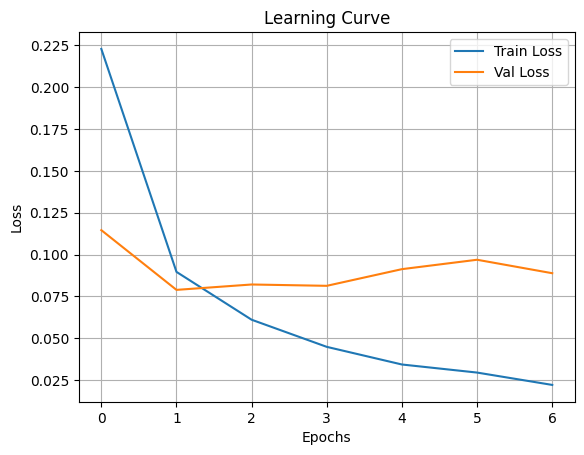

In [16]:
# Evaluasi di test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot loss curve
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()
